In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
drug_list = ["Abexinostat", "Belinostat", "Cerdulatinib", "Entinostat", "Fluorouracil", "Panobinostat", "Trichostatin", "Tucidinostat"]

all_results = {}
for drug in drug_list:
    all_results["FLeCS decay (" + drug + ")"] = pd.read_csv("logs/analysis_ genes_decay_" + drug + ".txt",
                                                    sep="\t", 
                                               skiprows=11)
    
    all_results["FLeCS prod (" + drug + ")"] = pd.read_csv("logs/analysis_ genes_prod_" + drug + ".txt",
                                                    sep="\t", 
                                               skiprows=11)
    
    all_results["FLeCS sum (" + drug + ")"] = pd.read_csv("logs/analysis_ genes_sum_" + drug + ".txt",
                                                    sep="\t", 
                                               skiprows=11)

    all_results["DE (" + drug + ")"] = pd.read_csv("logs/analysis_ DE_genes_" + drug + ".txt", sep="\t", 
                                            skiprows=11)

all_results["Random"] = pd.read_csv("logs/analysis_ rand_subsamp_genes.txt", sep="\t", skiprows=11)

In [48]:
all_res_df = []

for drug in drug_list:
    res_df = pd.DataFrame(list(all_results["FLeCS decay (" + drug + ")"]["genes_decay_" + drug + ".txt" + ' (raw P-value)']))
    res_df.columns = ["P-value"]
    res_df["method"] = "FLeCS (" + drug + ")"
    all_res_df.append(res_df)

    res_df = pd.DataFrame(list(all_results["DE (" + drug + ")"]["DE_genes_" + drug + ".txt" + ' (raw P-value)']))
    res_df.columns = ["P-value"]
    res_df["method"] = "DE (" + drug + ")"
    all_res_df.append(res_df)

res_df = pd.DataFrame(list(all_results["Random"]["rand_subsamp_genes.txt" + ' (raw P-value)']))
res_df.columns = ["P-value"]
res_df["method"] = "Random"
all_res_df.append(res_df)

all_res_df = pd.concat(all_res_df)

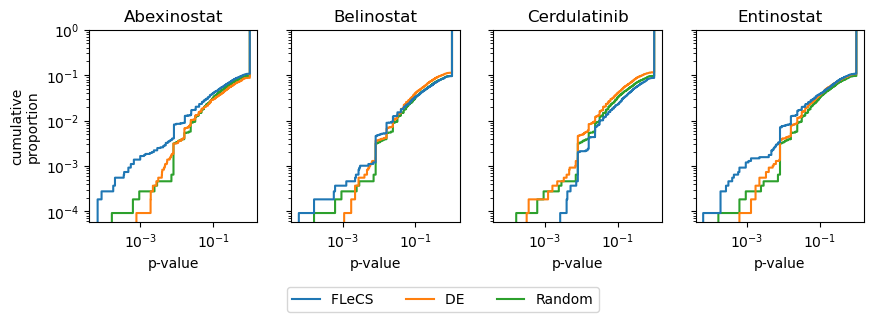

In [56]:
f, axes = plt.subplots(1, 4, figsize=(10, 2.5), sharex=True, sharey=True)
for i, drug in enumerate(drug_list[:4]):
    l = i % 4
    this_plot_df = all_res_df[all_res_df["method"].apply(lambda v: (drug in v) or (v == "Random"))].copy()
    this_plot_df["method"] = this_plot_df["method"].apply(lambda x: x.split("(")[0])

    g = sns.ecdfplot(data=this_plot_df, x="P-value", hue="method", log_scale=(True, True), ax=axes[l])
    g.set_title(drug)
    g.set_xlabel("p-value")
    g.set_ylabel("cumulative\nproportion")
    if i != 0:
        axes[l].get_legend().remove()
    else:
        sns.move_legend(axes[l], ncol=5, loc="upper center", bbox_to_anchor=(2.1, -.3), title="")

# plt.subplots_adjust(wspace=0.05, hspace=0.18)

plt.show()

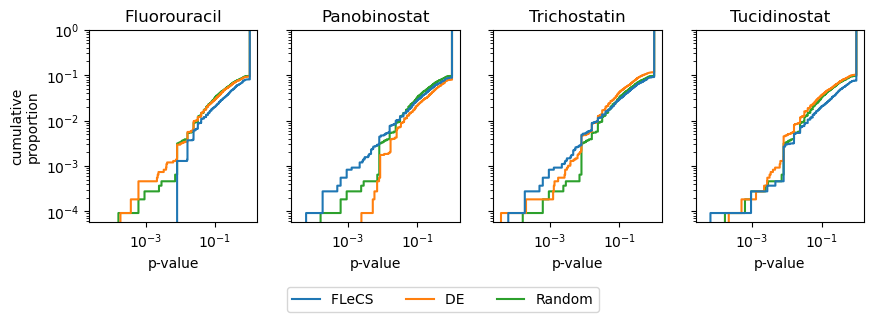

In [57]:
f, axes = plt.subplots(1, 4, figsize=(10, 2.5), sharex=True, sharey=True)
for i, drug in enumerate(drug_list[4:]):
    l = i % 4
    this_plot_df = all_res_df[all_res_df["method"].apply(lambda v: (drug in v) or (v == "Random"))].copy()
    this_plot_df["method"] = this_plot_df["method"].apply(lambda x: x.split("(")[0])

    g = sns.ecdfplot(data=this_plot_df, x="P-value", hue="method", log_scale=(True, True), ax=axes[l])
    g.set_title(drug)
    g.set_xlabel("p-value")
    g.set_ylabel("cumulative\nproportion")
    if i != 0:
        axes[l].get_legend().remove()
    else:
        sns.move_legend(axes[l], ncol=5, loc="upper center", bbox_to_anchor=(2.1, -.3), title="")

# plt.subplots_adjust(wspace=0.05, hspace=0.18)

plt.show()